# 5.2 Machine learning with scikit-learn

In [1]:
#

![jiqixuexi.png](jiqixuexi.png)

In [2]:
#

## 5.2.1 Business understanding

In [3]:
#

## 5.2.2 Data loading

In [4]:
import pandas as pd
import numpy as np
import os
os.chdir(r'C:\Users\JQW\Pythondata\Doctor_three\Codes\DataSets')
  
print(os.getcwd())

C:\Users\JQW\Pythondata\Doctor_three\Codes\DataSets


In [5]:
bc_data = pd.read_csv('bc_data.csv', header=0)

bc_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 5.2.3 Data understanding

In [6]:
print(bc_data.shape)

(569, 32)


In [7]:
print(bc_data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [8]:
print(bc_data.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

## 5.2.4 Data wrangling

In [9]:
#

In [10]:
data = bc_data.drop(['id'], axis=1)
print(data.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

In [11]:
X_data = data.drop(['diagnosis'], axis=1)
      
X_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
y_data = np.ravel(data[['diagnosis']])  
y_data[0:6]

array(['M', 'M', 'M', 'M', 'M', 'M'], dtype=object)

In [13]:
from sklearn.model_selection import train_test_split
X_trainingSet, X_testSet, y_trainingSet, y_testSet = train_test_split(X_data, y_data, random_state=1)

In [14]:
print(X_trainingSet.shape)

(426, 30)


In [15]:
print(X_testSet.shape)

(143, 30)


## 5.2.5 Model selection and hyperparameter tuning

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
myModel = KNeighborsClassifier(algorithm='kd_tree')

## 5.2.6 Model training

In [18]:
myModel.fit(X_trainingSet, y_trainingSet)   

KNeighborsClassifier(algorithm='kd_tree')

## 5.2.7 Predicting with a trained model

In [19]:
y_predictSet = myModel.predict(X_testSet)

In [20]:
print(y_predictSet)

['M' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'B']


In [21]:
print(y_testSet)

['B' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B']


## 5.2.8 Model evaluation

In [22]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_testSet, y_predictSet))

0.9370629370629371


## 5.2.9 Model optimization and application

In [23]:
# to create a for loop that trains various KNN models with different k values

from sklearn.neighbors import KNeighborsClassifier
NumberOfNeighbors = range(1,23)
KNNs = [KNeighborsClassifier(n_neighbors=i) for i in NumberOfNeighbors]
scores = [KNNs[i].fit(X_trainingSet, y_trainingSet).score(X_testSet,y_testSet) for i in range(len(KNNs))]
scores

[0.9230769230769231,
 0.9020979020979021,
 0.9230769230769231,
 0.9440559440559441,
 0.9370629370629371,
 0.9230769230769231,
 0.9300699300699301,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.916083916083916,
 0.916083916083916,
 0.916083916083916,
 0.916083916083916,
 0.916083916083916,
 0.916083916083916,
 0.9090909090909091]

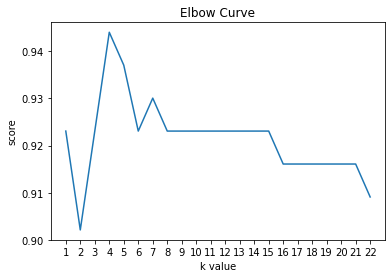

In [24]:
# to visualize the accuracy scores of the KNN models with k=1 to 23

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(NumberOfNeighbors,scores)
plt.rcParams['font.family'] = 'simHei'
plt.xlabel('k value')
plt.ylabel('score')
plt.title('Elbow Curve')
plt.xticks(NumberOfNeighbors)
plt.show()

In [25]:
# to retrain KNN model with the best K value(k=4) and calculate its accuracy score

from sklearn.neighbors import KNeighborsClassifier
myModel = KNeighborsClassifier(algorithm='kd_tree',n_neighbors=4)
myModel.fit(X_trainingSet, y_trainingSet)
y_predictSet = myModel.predict(X_testSet)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_testSet, y_predictSet))

0.9440559440559441


D:\ANACONDA\22222\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


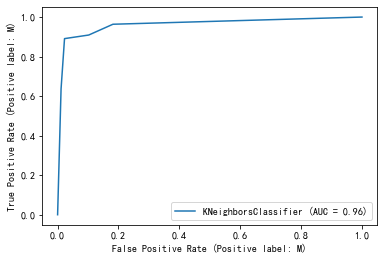

In [26]:
# to plot the ROC curve

import matplotlib.pyplot as plt
from sklearn import metrics
metrics.plot_roc_curve(myModel,X_testSet, y_testSet) 
plt.show()